In [63]:
# !pip install scikit-learn
# !pip install statsmodels

In [64]:
# 必要なパッケージをインポート
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import japanize_matplotlib
from pathlib import Path
# import tqdm
import random
import itertools
import seaborn as sns

random.seed(7)


In [77]:
# 乱数でデータフレーム作成
def create_df():
    random.seed(7)

    data_num = 1500
    rl1 = ["zero", "one", "two", "three"]#, "four"]
    rl2 = ["A", "B", "C", "D"]#, "e"]
    rl3 = ["あ", "い", "う", "え"]#, "お"]

    value1 = random.choices(rl1, k=data_num)
    value2 = random.choices(rl2, k=data_num)
    value3 = random.choices(rl3, k=data_num)
    value4 = [random.randrange(10, 500, 5) for i in range(data_num)]
    value5 = [random.randrange(100, 200, 10) for i in range(data_num)]

    dict_test = dict(user=value1, grade=value2, usage=value3, volume=value4, unit_cost=value5)
    df = pd.DataFrame(data=dict_test)
    return df
df = create_df()
display(df.shape)
display(df.head(5))

(1500, 5)

,user,grade,usage,volume,unit_cost
0,one,D,い,400,170
1,zero,A,あ,215,180
2,two,C,あ,210,130
3,zero,C,あ,120,120
4,two,A,え,475,130


## process1

In [78]:
user = "user"
grade = "grade"
usage = "usage"
volume = "volume"
concat_col = f"{user}_{grade}"

df[concat_col] = df[user] + df[grade]
df

,user,grade,usage,volume,unit_cost,user_grade
0,one,D,い,400,170,oneD
1,zero,A,あ,215,180,zeroA
2,two,C,あ,210,130,twoC
3,zero,C,あ,120,120,zeroC
4,two,A,え,475,130,twoA
...,...,...,...,...,...,...
1495,two,A,あ,405,120,twoA
1496,two,C,い,155,120,twoC
1497,three,D,い,290,150,threeD
1498,one,B,え,65,180,oneB


In [80]:
usage_li = list(df[usage].unique())
df_temp = pd.DataFrame()
for usage_nm in usage_li:
    df1 = df[df[usage] == usage_nm]
    df1_agg = (
        pd.DataFrame(
        pd.DataFrame(df1[[concat_col, volume]].groupby(concat_col).sum())
        .rename(columns={"volume":"total_volume"})
        #.sort_values(by="取引回数", ascending=False)
        #["取引回数"]
        .reset_index()
        )
    )
    df1_agg[usage] = usage_nm
    df_temp = pd.concat([df_temp, df1_agg], axis=0).reset_index(drop=True)
    
df_sum = df_temp.copy()
df_sum

,user_grade,total_volume,usage
0,oneA,6070,い
1,oneB,5555,い
2,oneC,4270,い
3,oneD,5380,い
4,threeA,5470,い
...,...,...,...
59,twoD,3020,う
60,zeroA,5655,う
61,zeroB,6350,う
62,zeroC,9095,う


<Axes: >

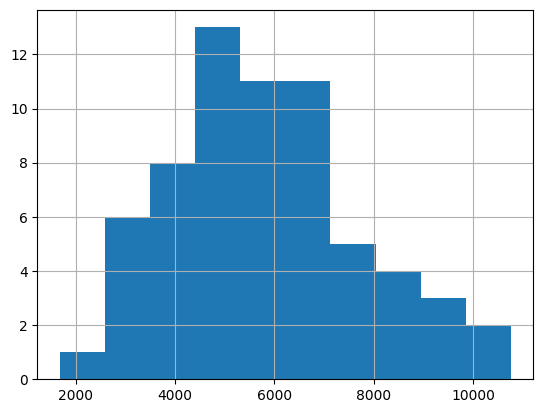

In [68]:
df_sum[volume].hist()

/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from current font.
  func(*args, **kwargs)
/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.
  func(*args, **kwargs)
/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from current font.
  func(*args, **kwargs)
/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  func(*args, **kwargs)
/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from current font.
  fig.canvas.p

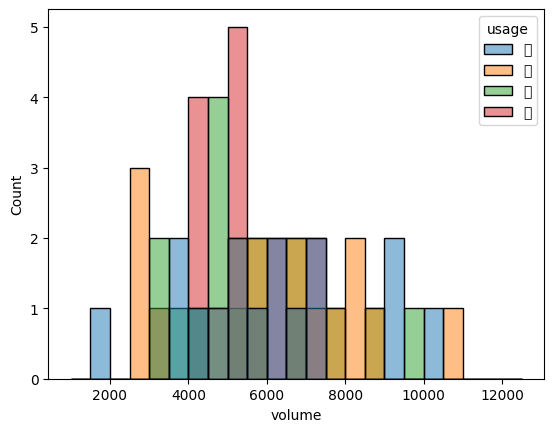

In [69]:
hist_df = df_sum
fig, ax = plt.subplots()
sns.histplot(data = hist_df, x = volume, hue = usage,
             bins=np.arange(1000, 13000, 500), 
             # kde = True
             )
ax.set_title("");

In [70]:
criterion1 = 4000
criterion2 = 6500
criterion3 = 8000

df_temp2 = pd.DataFrame()
usage_li = list(df_sum[usage].unique())
for usage_nm in usage_li:
    df_sum_sel = df_sum[df_sum[usage] == usage_nm]
    less4500_num = len(df_sum_sel[df_sum_sel[volume] <= criterion1])
    less6000_num = len(df_sum_sel[(df_sum_sel[volume] >= criterion1) & (df_sum_sel[volume] <= criterion2)])
    less8000_num = len(df_sum_sel[(df_sum_sel[volume] >= criterion2) & (df_sum_sel[volume] <= criterion3)])
    over8000_num = len(df_sum_sel[df_sum_sel[volume] >= criterion3])
    sum_num = less4500_num + less6000_num + less8000_num + over8000_num

    df_sum_sel_cnt = pd.DataFrame({"usage": [usage_nm],
                "criterion1以下":[less4500_num],
                "criterion2以下":[less6000_num],
                "criterion3以下":[less8000_num],
                "criterion3以上":[over8000_num],
                "total": [sum_num]})
    df_temp2 = pd.concat([df_temp2, df_sum_sel_cnt], axis=0).reset_index(drop=True)

df_sum_cnt = df_temp2.copy()
sum_row = df_sum_cnt.iloc[:, 1:].sum()# 各列の合計を計算
sum_li = sum_row.tolist()
sum_li.insert(0, 0)
df_sum_cnt.loc["total"] = sum_li
df_sum_cnt.loc["total", "usage"] = "total"
cnt_df = df_sum_cnt.reset_index(drop=True)
cnt_df

,usage,criterion1以下,criterion2以下,criterion3以下,criterion3以上,total
0,え,3,7,3,3,16
1,あ,3,5,4,4,16
2,う,3,8,3,2,16
3,い,1,12,3,0,16
4,total,10,32,13,9,64


In [71]:
ratio_df = cnt_df.copy()
ratio_df["criterion1以下"] = round(ratio_df["criterion1以下"] / ratio_df["total"] * 100)
ratio_df["criterion2以下"] = round(ratio_df["criterion2以下"] / ratio_df["total"] * 100)
ratio_df["criterion3以下"] = round(ratio_df["criterion3以下"] / ratio_df["total"] * 100)
ratio_df["criterion3以上"] = round(ratio_df["criterion3以上"] / ratio_df["total"] * 100)

ratio_df

,usage,criterion1以下,criterion2以下,criterion3以下,criterion3以上,total
0,え,19.0,44.0,19.0,19.0,16
1,あ,19.0,31.0,25.0,25.0,16
2,う,19.0,50.0,19.0,12.0,16
3,い,6.0,75.0,19.0,0.0,16
4,total,16.0,50.0,20.0,14.0,64


## process2

,user_grade,volume
0,oneA,9050
1,oneB,5420
2,oneC,4220
3,oneD,3510
4,threeA,3820
...,...,...
59,twoD,5550
60,zeroA,7180
61,zeroB,5350
62,zeroC,4050


array([[<Axes: title={'center': 'volume'}>]], dtype=object)

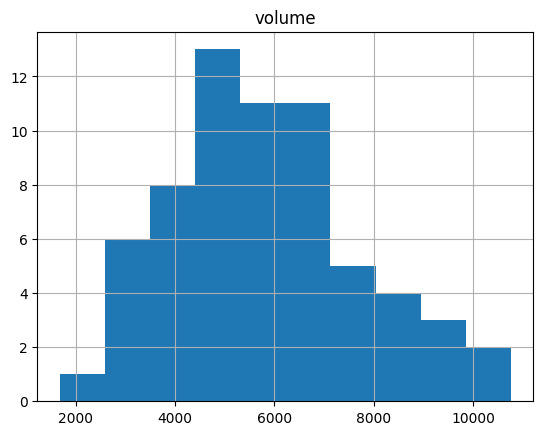

In [75]:
data = df_sum.drop("usage", axis=1)
display(data)
data.hist()